In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,price*rating,ave_agi,count
0,0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,4.0,37.21102,166
1,1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,3.0,37.21102,166
2,2,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,157.0,91776,9.0,37.21102,166
3,3,young-dong-tofu-house-san-gabriel-2,"['korean', 'soup', 'bbq']",San Gabriel,ArjemSkdDmtaSOJ05ayM6Q,34.104029,-118.087644,2,4.0,2235.0,91776,8.0,37.21102,166
4,4,yoshino-sushi-san-gabriel,"['sushi', 'japanese']",San Gabriel,tD6NoOzVpVuhzRVdCU7POQ,34.080471,-118.092799,2,3.5,923.0,91776,7.0,37.21102,166


In [3]:
df.shape

(34095, 14)

In [4]:
df.drop(columns = ['id','Unnamed: 0'], inplace = True)

## Tried CountVectorizer to make the matrix of category and analyse the result, it did not turn well. So eleminate that part from model

In [5]:
#cvec = CountVectorizer()

In [6]:
#X = df['category']
#y=df['ave_agi']

In [7]:
#df_cato = pd.DataFrame(cvec.fit_transform(X).toarray(),
                  #columns=cvec.get_feature_names())
#df_cato.head()

In [8]:
#df_cato.shape

In [9]:
#df['zip_code'].nunique()

In [10]:
#pd.concat([df, df_cato], axis=1)

In [11]:
#df_cato = pd.concat([df, df_cato], axis=1)
#df_cato.head

In [12]:
#type(df)

In [13]:
df.shape

(34095, 12)

In [14]:
#df_cato.shape

In [15]:
numeric_data = df._get_numeric_data().columns

In [16]:
X = df._get_numeric_data().drop(columns=['ave_agi'])
#features = list(X.columns)
y = df['ave_agi']

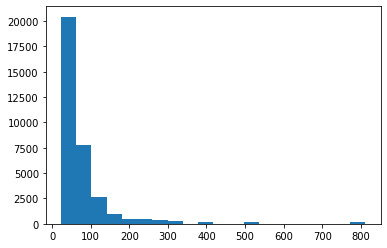

In [17]:
plt.hist(df["ave_agi"], bins=20);

In [18]:
y = np.log(df.copy()["ave_agi"])

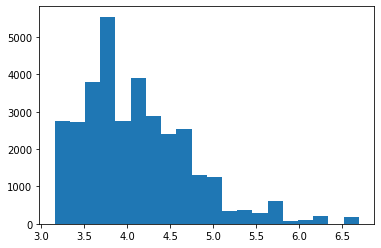

In [19]:
plt.hist(y, bins=20);

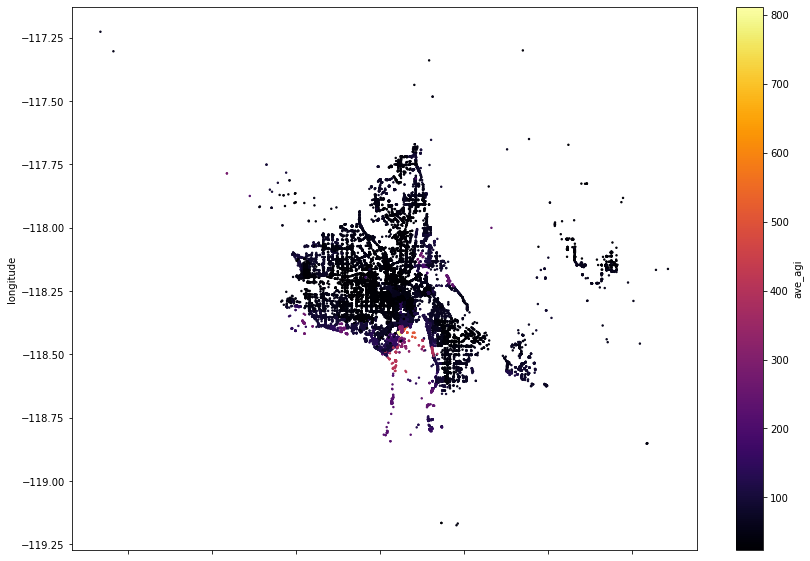

In [20]:
df.plot(kind="scatter", x="latitude", y="longitude", c="ave_agi",
         cmap="inferno", figsize=(14, 10), s=2);

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5
)

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr.score(X_train, y_train)

0.19407030600916828

In [25]:
lr.score(X_test,y_test)

0.1967573929004489

In [26]:
location_data = df[["latitude", "longitude"]]
location_data.head()

,latitude,longitude
0,34.103070,-118.091840
1,34.081429,-118.084785
2,34.102080,-118.109870
3,34.104029,-118.087644
4,34.080471,-118.092799


In [34]:
km = KMeans(n_clusters=97)
km.fit(location_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=97, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

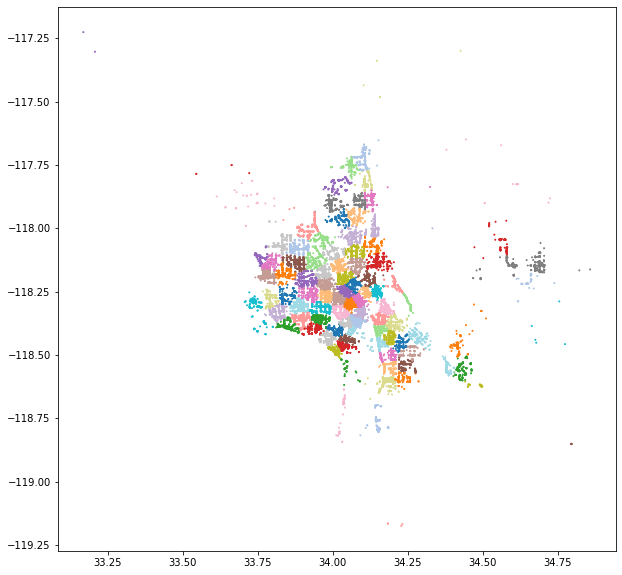

In [35]:
plt.figure(figsize=(10, 10))
plt.scatter(df.latitude, df.longitude, c=km.labels_, s=1, cmap="tab20");

In [36]:
X.loc[:, "cluster"] = km.predict(location_data)
X = pd.get_dummies(columns=["cluster"], data=X)
X.head()

,latitude,longitude,price,rating,review_count,zip_code,price*rating,count,cluster_0,cluster_1,...,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96
0,34.103070,-118.091840,1,4.0,204.0,91776,4.0,166,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.081429,-118.084785,1,3.0,263.0,91776,3.0,166,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34.102080,-118.109870,2,4.5,157.0,91776,9.0,166,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.104029,-118.087644,2,4.0,2235.0,91776,8.0,166,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.080471,-118.092799,2,3.5,923.0,91776,7.0,166,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), random_state=42, test_size=0.5
)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7541247835359984

In [32]:
def transfer_tune(X, y, k):
    location_data = df[["latitude", "longitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [33]:
for k in range(2, 103, 5):
    transfer_tune(X, y, k)

2 : 0.48911650502670945
7 : 0.4994043737451338
12 : 0.5154786855509943
17 : 0.49869553930138333
22 : 0.5345410555180958
27 : 0.5588884363450317
32 : 0.5740374206242636
37 : 0.5658958657647722
42 : 0.6282273111618368
47 : 0.6312758211195567
52 : 0.6911754065003841
57 : 0.6789588774924101
62 : 0.6627659079246702
67 : 0.6922453397772192
72 : 0.6754196678635662
77 : 0.7312036571017859
82 : 0.7330192898096265
87 : 0.7300540129304559
92 : 0.7203123504371791
97 : 0.7621139182127866
102 : 0.7550886950508747
